In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA

# EDA

In [286]:
wine=pd.read_csv("/content/sample_data/wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [287]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [288]:
wine_new=wine.drop('Type',axis=1)
wine_type=wine[['Type']]
wine_new.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [289]:
wine_new.shape

(178, 13)

In [290]:
wine_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [291]:
#from above we saw there is no null column so we can proceed with PCA


#from above we saw there is no null column so we can proceed with PCA

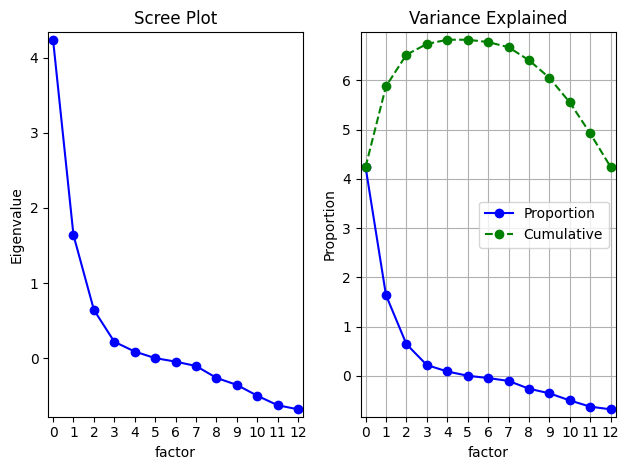

In [292]:
#lets do scree plot to find optimal PC cloumns
from statsmodels.multivariate.factor import Factor
model=Factor(wine_new).fit()
model.plot_scree()
plt.grid()
plt.show()

from above it is showing if we take 3 pca then we can cover majority of variance

In [293]:
def norm_fun(val):
  return (val-val.min())/(val.max()-val.min())

In [294]:
#PCA
#lets standardize the value
wine_std=norm_fun(wine_new)
wine_std

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [295]:
pca_wine=PCA()
pca_wine_value=pca_wine.fit_transform(wine_std)

In [296]:
print(pca_wine.explained_variance_ratio_*100)
print("*********************************")
print(np.cumsum(pca_wine.explained_variance_ratio_)*100)

[40.74948456 18.97035178  8.56167062  7.4266778   5.5653011   4.65883719
  3.66392891  2.4087893   2.27437053  2.25096456  1.38129247  1.27323592
  0.81509526]
*********************************
[ 40.74948456  59.71983634  68.28150696  75.70818476  81.27348586
  85.93232305  89.59625195  92.00504125  94.27941178  96.53037634
  97.91166882  99.18490474 100.        ]


In [297]:
#considernig 3 PC
pca_wine=PCA(n_components=3)
pca_wine_value=pca_wine.fit_transform(wine_std)
print(pca_wine.explained_variance_ratio_*100)
print("*********************************")
print(np.cumsum(pca_wine.explained_variance_ratio_)*100)

[40.74948456 18.97035178  8.56167062]
*********************************
[40.74948456 59.71983634 68.28150696]


In [298]:
pca_wine_value

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [299]:
pca_wine.components_


array([[-0.13336766,  0.24851581, -0.00073917,  0.17783862, -0.08865728,
        -0.39507087, -0.41458979,  0.33310861, -0.2529021 ,  0.09232904,
        -0.25113726, -0.4734921 , -0.28686211],
       [-0.55088368, -0.22739058, -0.1630912 ,  0.07977633, -0.18816566,
        -0.07414473, -0.00100692, -0.00996037, -0.03141788, -0.5197075 ,
         0.23720622,  0.21556225, -0.44388836],
       [-0.08384838,  0.49203927,  0.40300937,  0.47724241,  0.0065507 ,
         0.25306514,  0.19610546,  0.28598186,  0.22834235, -0.03309997,
        -0.10658878,  0.29777629, -0.15196829]])

In [300]:
wine_final=pd.concat([wine_type,pd.DataFrame(pca_wine_value,columns=['pc1','pc2','pc3'])],axis=1)
wine_final

,Type,pc1,pc2,pc3
0,1,-0.706336,-0.253193,0.024093
1,1,-0.484977,-0.008823,-0.280482
2,1,-0.521172,-0.189187,0.196217
3,1,-0.821644,-0.580906,0.081110
4,1,-0.202546,-0.059467,0.300240
...,...,...,...,...
173,3,0.739510,-0.471901,0.209360
174,3,0.581781,-0.348366,0.083590
175,3,0.626313,-0.546857,-0.030495
176,3,0.572991,-0.425516,-0.094537


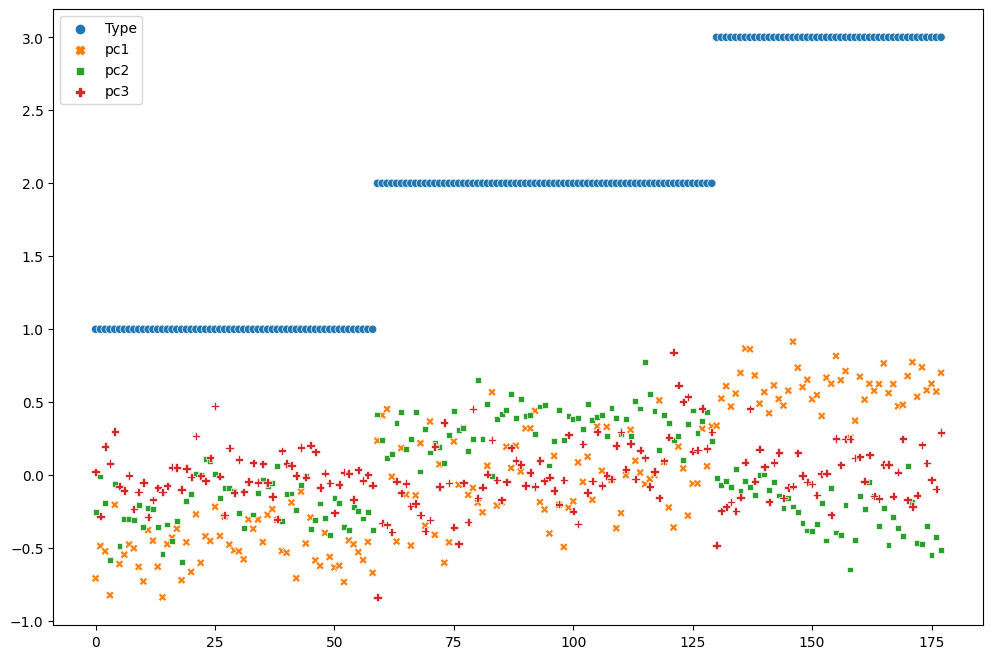

In [301]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=wine_final);

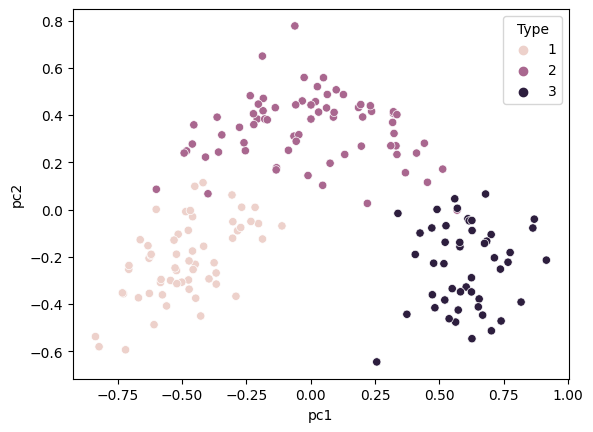

In [302]:
sns.scatterplot(data=wine_final, x='pc1', y='pc2',hue='Type');

In [303]:
# lets check the coliinerity between PCs
wine_pc=pd.DataFrame(pca_wine_value,columns=['pc1','pc2','pc3',])
np.round(wine_pc.corr(),3)
#there is no collinerity


,pc1,pc2,pc3
pc1,1.0,0.0,-0.0
pc2,0.0,1.0,0.0
pc3,-0.0,0.0,1.0


#lets perform clustering on the new data sheet (heirarchial and K-means)

In [304]:
#heirarchial
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [305]:
wine_pc #dataset with pc columns

,pc1,pc2,pc3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [306]:
#lets normalise 
wine_pc_norm=norm_fun(wine_pc)
wine_pc_norm

,pc1,pc2,pc3
0,0.073893,0.275583,0.512299
1,0.200316,0.447330,0.330847
2,0.179644,0.320567,0.614843
3,0.008038,0.045262,0.546267
4,0.361619,0.411737,0.676816
...,...,...,...
173,0.899650,0.121871,0.622674
174,0.809567,0.208694,0.547745
175,0.835000,0.069191,0.479778
176,0.804547,0.154472,0.441625


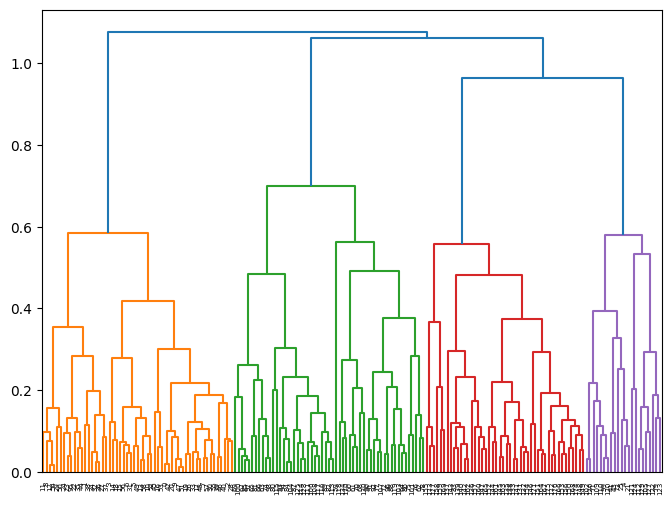

In [307]:
plt.figure(figsize=(8,6))
dendogram=sch.dendrogram(sch.linkage(wine_pc_norm,'complete'))

In [308]:
#create-clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
y_hc=hc.fit_predict(wine_pc_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [309]:
wine_pc1=wine_pc
wine_pc1['clusterid']=y_hc
wine_pc1


,pc1,pc2,pc3,clusterid
0,-0.706336,-0.253193,0.024093,0
1,-0.484977,-0.008823,-0.280482,0
2,-0.521172,-0.189187,0.196217,0
3,-0.821644,-0.580906,0.081110,0
4,-0.202546,-0.059467,0.300240,0
...,...,...,...,...
173,0.739510,-0.471901,0.209360,2
174,0.581781,-0.348366,0.083590,2
175,0.626313,-0.546857,-0.030495,2
176,0.572991,-0.425516,-0.094537,2


In [310]:
wine_clust=wine_pc1.groupby('clusterid').mean()
wine_clust

,pc1,pc2,pc3
clusterid,,,
0,-0.257794,0.083984,0.018543
1,0.236612,0.415898,-0.835821
2,0.582815,-0.198998,-0.026759


In [311]:
#K-MEANS
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [312]:
#we have the pc columns with normalised values
wine_pc_norm

,pc1,pc2,pc3
0,0.073893,0.275583,0.512299
1,0.200316,0.447330,0.330847
2,0.179644,0.320567,0.614843
3,0.008038,0.045262,0.546267
4,0.361619,0.411737,0.676816
...,...,...,...
173,0.899650,0.121871,0.622674
174,0.809567,0.208694,0.547745
175,0.835000,0.069191,0.479778
176,0.804547,0.154472,0.441625


In [313]:
wss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(wine_pc_norm)
  wss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

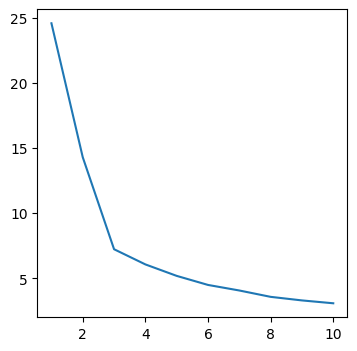

In [314]:
#elbow plot
plt.figure(figsize=(4,4))
plt.plot(range(1,11),wss)

In [315]:
#lets check for cluster id =3 
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_pc_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [316]:
print("silhoute_score for n_cluster=3 :{}".format(silhouette_score(wine_pc_norm,kmeans.labels_)))

silhoute_score for n_cluster=3 :0.4945629619064757


In [317]:
#lets check for cluster id =4
kmeans=KMeans(n_clusters=4)
kmeans.fit(wine_pc_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [318]:
print("silhoute_score n_cluster=4: {}".format(silhouette_score(wine_pc_norm,kmeans.labels_)))

silhoute_score n_cluster=4: 0.4173946852382303


since from above silhouette_score  (n_cluster=3 :0.4945629619064757) > (n_cluster=4: 0.4173946852382303)so we will go with 3 cluster

In [319]:
wine_pc2=wine_pc
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_pc_norm)
wine_pc2['clusterid']=kmeans.labels_
wine_pc2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pc1,pc2,pc3,clusterid
0,-0.706336,-0.253193,0.024093,0
1,-0.484977,-0.008823,-0.280482,0
2,-0.521172,-0.189187,0.196217,0
3,-0.821644,-0.580906,0.081110,0
4,-0.202546,-0.059467,0.300240,0


In [320]:
df_clust=wine_pc2.groupby('clusterid').mean()
df_clust

,pc1,pc2,pc3
clusterid,,,
0,-0.486668,-0.205241,-0.003254
1,-0.015481,0.364009,0.015543
2,0.590250,-0.214247,-0.015612


#lets manupulate with original data to check optimum number of cluster

In [321]:
wine=pd.read_csv("/content/sample_data/wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [322]:
wine_new = wine.drop('Type',axis=1)
wine_new.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


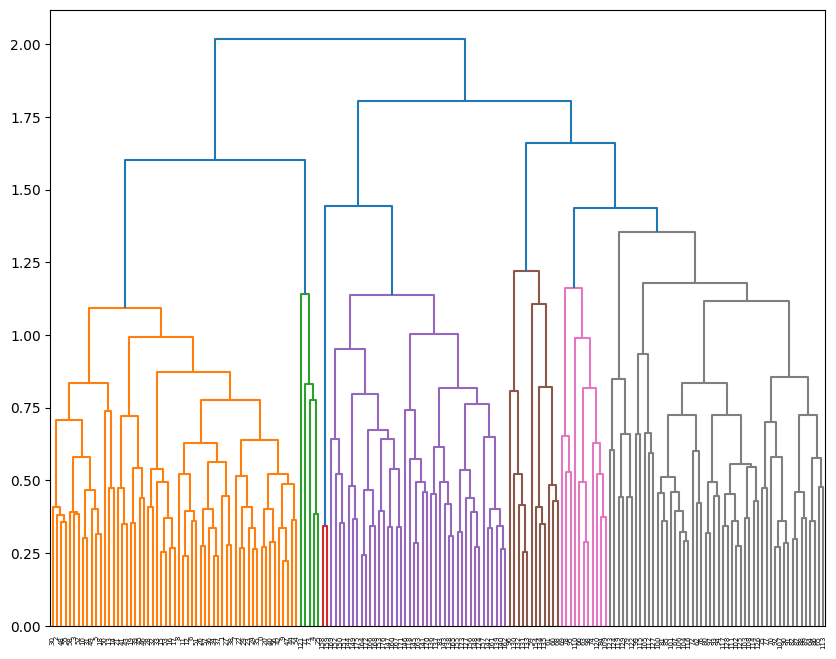

In [323]:
#hierarchial 
wine_new_norm=norm_fun(wine_new)
plt.figure(figsize=(10,8))
dendogram=sch.dendrogram(sch.linkage(wine_new_norm,'complete'))

In [324]:
#clustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
y_hc=hc.fit_predict(wine_new_norm)
wine_new['clusterid']=y_hc


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [325]:
df_clust=wine_new.groupby('clusterid').mean()
df_clust

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterid,,,,,,,,,,,,,
0,13.012386,2.345909,2.36733,19.494318,99.698864,2.291875,2.020227,0.361705,1.595966,5.070398,0.95708,2.610057,749.784091
1,11.560000,2.050000,3.23000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.93000,3.690000,465.000000
2,12.370000,0.940000,1.36000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.05000,1.820000,520.000000


In [326]:
#Kmean
wine_new1 = wine.drop('Type',axis=1)
wine_new1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [327]:
#aftre normalising
wine_new_norm=norm_fun(wine_new1)
wine_new_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [328]:
#lets do kmeans clustering and store the wcss value for elbow plot
wss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i)
  k_means.fit(wine_new_norm)
  wss.append(k_means.inertia_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

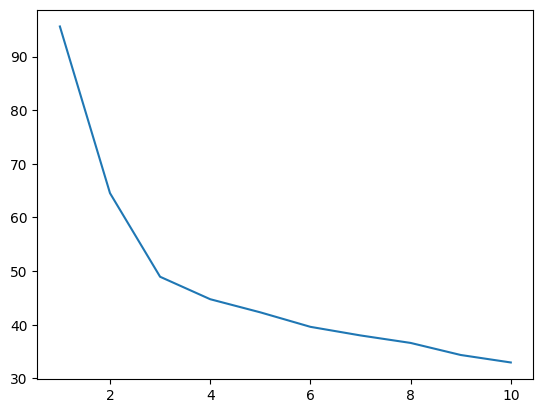

In [329]:
#elbow plot
plt.plot(range(1,11),wss)

In [330]:
#lets check for cluster id =3 
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_new_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [331]:
print("silhoute_score for n_cluster=3 :{}".format(silhouette_score(wine_new_norm,kmeans.labels_)))

silhoute_score for n_cluster=3 :0.3013463273503232


In [332]:
#lets check for cluster id =4 
kmeans=KMeans(n_clusters=4)
kmeans.fit(wine_new_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [333]:
print("silhoute_score for n_cluster=4 :{}".format(silhouette_score(wine_new_norm,kmeans.labels_)))

silhoute_score for n_cluster=4 :0.25993667561623146


now from above clustering with original data i conclude that cluster numer = 3 will be optimum